In [10]:
import pandas as pd

# Define the file paths
input_file = 'SML.csv'

# Read the text file


# Maunally define the column names
# column_names = [
#     'Date', 'Time', 'Temperature_Comedor_Sensor', 'Temperature_Habitacion_Sensor', 'Weather_Temperature',
#     'CO2_Comedor_Sensor', 'CO2_Habitacion_Sensor', 'Humedad_Comedor_Sensor', 'Humedad_Habitacion_Sensor',
#     'Lighting_Comedor_Sensor', 'Lighting_Habitacion_Sensor', 'Precipitacion', 'Meteo_Exterior_Crepusculo',
#     'Meteo_Exterior_Viento', 'Meteo_Exterior_Sol_Oest', 'Meteo_Exterior_Sol_Est', 'Meteo_Exterior_Sol_Sud',
#     'Meteo_Exterior_Piranometro', 'Exterior_Entalpic_1', 'Exterior_Entalpic_2', 'Exterior_Entalpic_turbo',
#     'Temperature_Exterior_Sensor', 'Humedad_Exterior_Sensor', 'Day_Of_Week'
# ]

# Assuming the text file is space-separated and has a header row
df = pd.read_csv(input_file)

# Display the DataFrame to verify it was read correctly
# print("DataFrame:")
df.head()




,Date,Time,Temperature_Comedor_Sensor,Temperature_Habitacion_Sensor,Weather_Temperature,CO2_Comedor_Sensor,CO2_Habitacion_Sensor,Humedad_Comedor_Sensor,Humedad_Habitacion_Sensor,Lighting_Comedor_Sensor,...,Meteo_Exterior_Sol_Oest,Meteo_Exterior_Sol_Est,Meteo_Exterior_Sol_Sud,Meteo_Exterior_Piranometro,Exterior_Entalpic_1,Exterior_Entalpic_2,Exterior_Entalpic_turbo,Temperature_Exterior_Sensor,Humedad_Exterior_Sensor,Day_Of_Week
0,13-03-2012,11:45,18.1875,17.8275,0.0,216.560,221.920,39.9125,42.4150,81.6650,...,9690.24,12604.20,95436.8,758.880,0,0,0,18.1150,48.3750,2.0
1,13-03-2012,12:00,18.4633,18.1207,6.8,219.947,220.363,39.9267,42.2453,81.7413,...,11022.00,10787.20,95436.8,762.069,0,0,0,18.4147,47.8080,2.0
2,13-03-2012,12:15,18.7673,18.4367,17.0,219.403,218.933,39.7720,42.2267,81.4240,...,13960.50,9669.63,95398.6,766.251,0,0,0,18.8533,47.4320,2.0
3,13-03-2012,12:30,19.0727,18.7513,18.0,218.613,217.045,39.7760,42.0987,81.5013,...,18511.20,9648.13,95360.3,766.037,0,0,0,19.2907,47.0240,2.0
4,13-03-2012,12:45,19.3721,19.0414,20.0,217.714,216.080,39.7757,42.0686,81.4657,...,26349.00,9208.32,95354.9,762.743,0,0,0,19.7400,45.4743,2.0


In [11]:
# Check the data types of the columns
print("\nData types:")
print(df.dtypes)


Data types:
Date                              object
Time                              object
Temperature_Comedor_Sensor       float64
Temperature_Habitacion_Sensor    float64
Weather_Temperature              float64
CO2_Comedor_Sensor               float64
CO2_Habitacion_Sensor            float64
Humedad_Comedor_Sensor           float64
Humedad_Habitacion_Sensor        float64
Lighting_Comedor_Sensor          float64
Lighting_Habitacion_Sensor       float64
Precipitacion                    float64
Meteo_Exterior_Crepusculo        float64
Meteo_Exterior_Viento            float64
Meteo_Exterior_Sol_Oest          float64
Meteo_Exterior_Sol_Est           float64
Meteo_Exterior_Sol_Sud           float64
Meteo_Exterior_Piranometro       float64
Exterior_Entalpic_1                int64
Exterior_Entalpic_2                int64
Exterior_Entalpic_turbo            int64
Temperature_Exterior_Sensor      float64
Humedad_Exterior_Sensor          float64
Day_Of_Week                      float64
dty

In [12]:
# Checking for missing values
df.isnull().sum()

Date                             0
Time                             0
Temperature_Comedor_Sensor       0
Temperature_Habitacion_Sensor    0
Weather_Temperature              0
CO2_Comedor_Sensor               0
CO2_Habitacion_Sensor            0
Humedad_Comedor_Sensor           0
Humedad_Habitacion_Sensor        0
Lighting_Comedor_Sensor          0
Lighting_Habitacion_Sensor       0
Precipitacion                    0
Meteo_Exterior_Crepusculo        0
Meteo_Exterior_Viento            0
Meteo_Exterior_Sol_Oest          0
Meteo_Exterior_Sol_Est           0
Meteo_Exterior_Sol_Sud           0
Meteo_Exterior_Piranometro       0
Exterior_Entalpic_1              0
Exterior_Entalpic_2              0
Exterior_Entalpic_turbo          0
Temperature_Exterior_Sensor      0
Humedad_Exterior_Sensor          0
Day_Of_Week                      0
dtype: int64

In [13]:
df['Day_Of_Week']

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
4132    3.0
4133    3.0
4134    3.0
4135    3.0
4136    3.0
Name: Day_Of_Week, Length: 4137, dtype: float64

<Axes: xlabel='Precipitacion'>

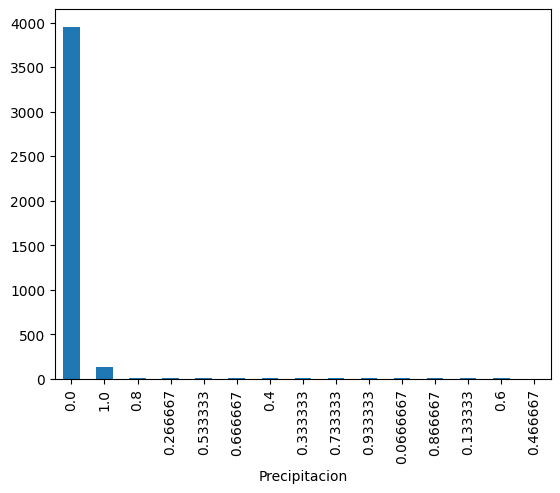

In [14]:
import seaborn as sns
df['Precipitacion'].value_counts().plot(kind='bar')

<Axes: xlabel='Precipitacion_Category'>

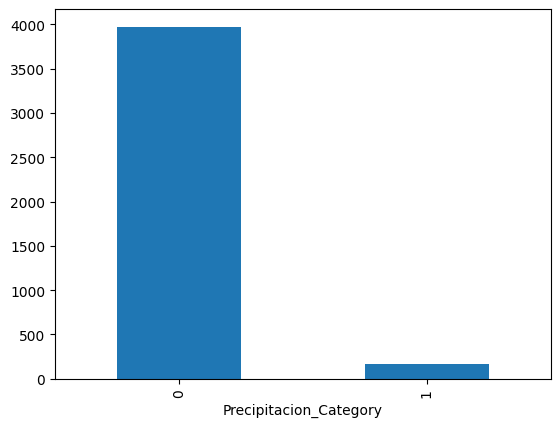

In [15]:
# Create a category of the preicipation if the probability is greater than 0.5
df['Precipitacion_Category'] = df['Precipitacion'].apply(lambda x: 1 if x > 0.5 else 0)
df['Precipitacion_Category'].value_counts().plot(kind='bar')

<Axes: xlabel='Precipitacion_Category'>

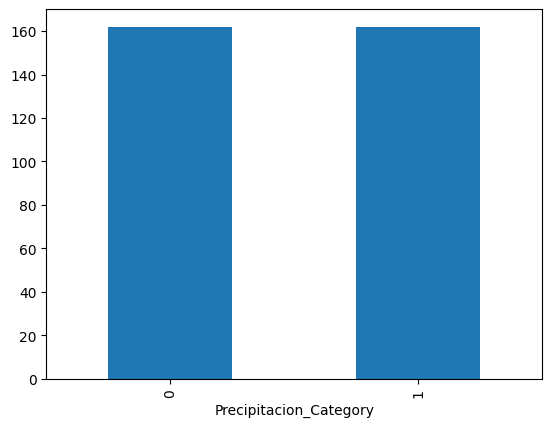

In [16]:
# Since the data is time series, we can use the date as the index
# and the dataset is imbalanced, we can undersample the Majority data where the precipitation is 0
from sklearn.utils import resample
df_majority = df[df['Precipitacion_Category'] == 0]
df_minority = df[df['Precipitacion_Category'] == 1]
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority),     
                                   random_state=123) # reproducible results
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled['Precipitacion_Category'].value_counts().plot(kind='bar')

In [17]:
df_downsampled['DateTime'] = pd.to_datetime(df_downsampled['Date'] + ' ' + df_downsampled['Time'], format='mixed')

# Extract date and time components
df_downsampled['Year'] = df_downsampled['DateTime'].dt.year
df_downsampled['Month'] = df_downsampled['DateTime'].dt.month
df_downsampled['Day'] = df_downsampled['DateTime'].dt.day
df_downsampled['Hour'] = df_downsampled['DateTime'].dt.hour
df_downsampled['Minute'] = df_downsampled['DateTime'].dt.minute
df_downsampled['Second'] = df_downsampled['DateTime'].dt.second
df_downsampled['DayOfWeek'] = df_downsampled['DateTime'].dt.dayofweek

# Drop the original 'DateTime' column
df_downsampled.drop(columns=['DateTime'], inplace=True)
df_downsampled.drop(columns=['Date','Time'],axis=1, inplace=True)




<Axes: xlabel='DayOfWeek'>

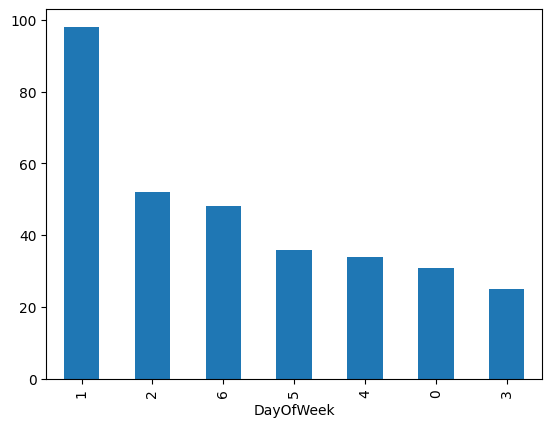

In [18]:
df_downsampled['DayOfWeek'].value_counts().plot(kind='bar')


In [19]:
df_downsampled.dtypes   


Temperature_Comedor_Sensor       float64
Temperature_Habitacion_Sensor    float64
Weather_Temperature              float64
CO2_Comedor_Sensor               float64
CO2_Habitacion_Sensor            float64
Humedad_Comedor_Sensor           float64
Humedad_Habitacion_Sensor        float64
Lighting_Comedor_Sensor          float64
Lighting_Habitacion_Sensor       float64
Precipitacion                    float64
Meteo_Exterior_Crepusculo        float64
Meteo_Exterior_Viento            float64
Meteo_Exterior_Sol_Oest          float64
Meteo_Exterior_Sol_Est           float64
Meteo_Exterior_Sol_Sud           float64
Meteo_Exterior_Piranometro       float64
Exterior_Entalpic_1                int64
Exterior_Entalpic_2                int64
Exterior_Entalpic_turbo            int64
Temperature_Exterior_Sensor      float64
Humedad_Exterior_Sensor          float64
Day_Of_Week                      float64
Precipitacion_Category             int64
Year                               int32
Month           

In [ ]:
# Naive baysian model building
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
X = df_downsampled.drop(['Precipitacion_Category', 'Precipitacion'], axis=1)
y = df_downsampled['Precipitacion_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
# Making the confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8
[[23 11]
 [ 2 29]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78        34
           1       0.72      0.94      0.82        31

    accuracy                           0.80        65
   macro avg       0.82      0.81      0.80        65
weighted avg       0.83      0.80      0.80        65

